In [40]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import os
import torch

In [41]:
root_dir= 'Data/room=[6,6,2.4]'

In [46]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, is_test=False):
        dirs = os.listdir(root_dir)
        dirs = [dir for dir in dirs if dir.startswith('Test') == is_test]
        self.revs = None
        self.targets = None
        for dir in dirs:
            rev_target_dirs = os.listdir(os.path.join(root_dir,dir))
            rev_dir = [d for d in rev_target_dirs if d.startswith('beta')][0]
            target_dir = [d for d in rev_target_dirs if d.startswith('Target')][0]
            rev = os.path.join(root_dir,dir,rev_dir,'data_phase.npy' if is_test else 'Reverberated/data_phase.npy' )
            a = np.load(rev)
            if self.revs is None:
                self.revs = np.copy(a[:,:,:126])
            else:
                self.revs = np.vstack((self.revs,a[:,:,:126]))
            self.revs = np.vstack((self.revs,a[:,:,126:]))
            target = os.path.join(root_dir,dir,target_dir,'data_phase.npy')
            b = np.load(target)
            if self.targets is None:
                self.targets = np.copy(b[:,:,:126])
            else:
                self.targets = np.vstack((self.targets,b[:,:,:126]))
            self.targets = np.vstack((self.targets,b[:,:,:126]))

        
    def __len__(self):
        return self.targets.shape[0]

    def __getitem__(self, idx):
        reverberated_image = self.revs[idx, :, :]
        target_image = self.targets[idx, :, :]
        return torch.from_numpy(reverberated_image), torch.from_numpy(target_image)

training_data = CustomImageDataset(root_dir)
test_data = CustomImageDataset(root_dir, is_test=True)

(3025, 7, 252)
(3025, 7, 252)
(3025, 7, 252)
(3025, 7, 252)
(3025, 7, 252)
(3025, 7, 252)
(3025, 7, 252)


In [47]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [49]:
# Display image and label.
train_rev, train_target = next(iter(train_dataloader))



<function matplotlib.pyplot.show(close=None, block=None)>

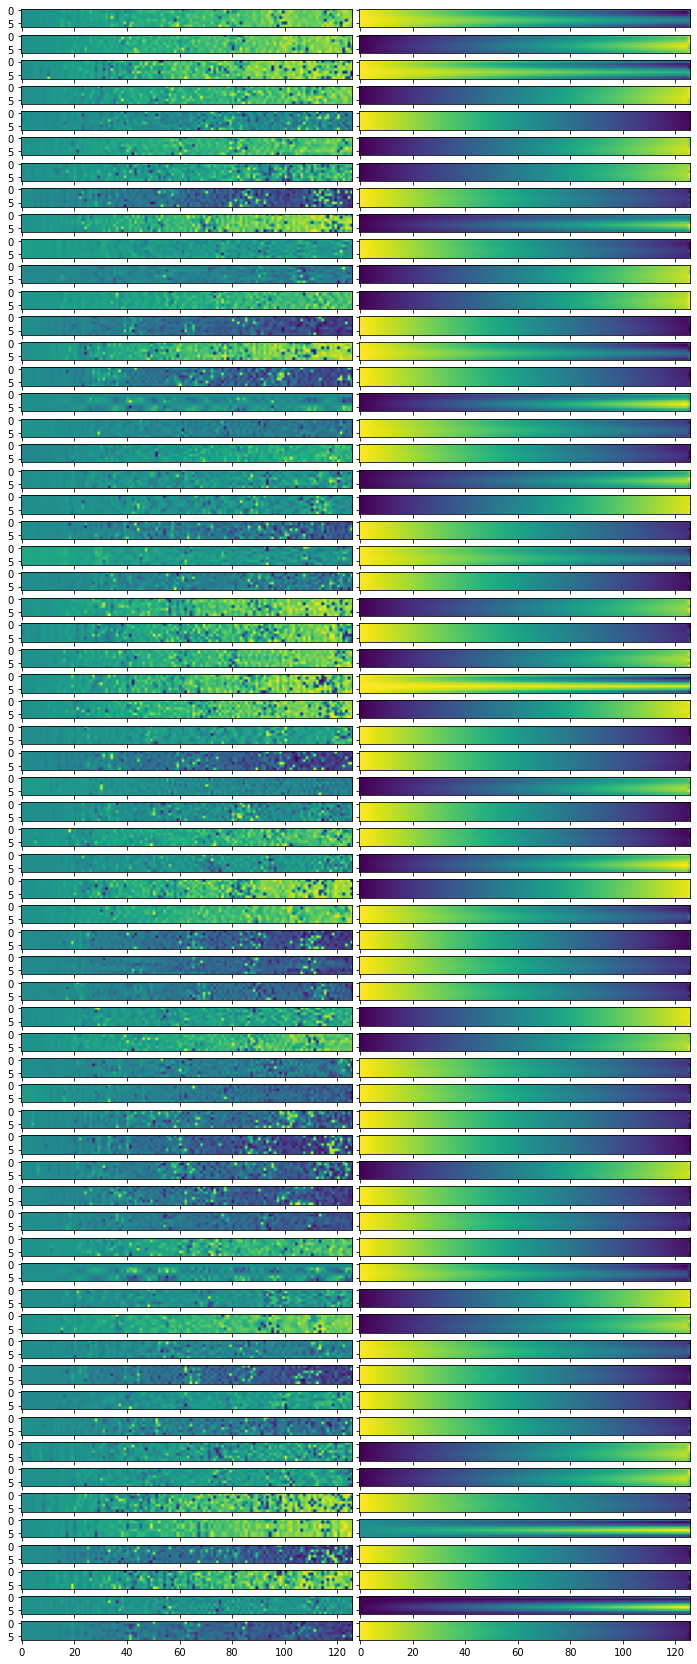

In [51]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(14., 30))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(64, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

l = []
for i in range(64):
	l.append(train_rev[i])
	l.append(train_target[i])

for ax, im in zip(grid, l):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
